#  Programming Assignment 2
* Author: Shreya Dubey 

In [21]:
# Using LoadDataModule.py for decompressing the dataset.
from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt
import math

'''load your data here'''

class LoadDataModule(object):
    def __init__(self):
        self.DIR = './'
        pass
    
    # Returns images and labels corresponding for training and testing. Default mode is train. 
    # For retrieving test data pass mode as 'test' in function call.
    def load(self, mode = 'train'):
        label_filename = mode + '_labels'
        image_filename = mode + '_images'
        label_zip = self.DIR + label_filename + '.zip'
        image_zip = self.DIR + image_filename + '.zip'
        with ZipFile(label_zip, 'r') as lblzip:
            labels = np.frombuffer(lblzip.read(label_filename), dtype=np.uint8, offset=8)
        with ZipFile(image_zip, 'r') as imgzip:
            images = np.frombuffer(imgzip.read(image_filename), dtype=np.uint8, offset=16).reshape(len(labels), 784)
        return images, labels

# Usage

ld = LoadDataModule()

#Now let's load the dataset
images,labels = ld.load('train')

In [22]:
# Importing all the required libraries.

import numpy as np
import sklearn
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.preprocessing import MinMaxScaler
from numba import jit

In [23]:
# Changing the label value to a vector

train_label = np.zeros((images.shape[0],10))
for i in range(len(labels)):
    train_label[i,labels[i]] = 1

# Normalizing the training data
    
scaler = MinMaxScaler()
images = scaler.fit_transform(images)
    
# Reshaping the training images

train_images = np.empty((images.shape[0],28,28))
for i in range (images.shape[0]):
    train_images[i,:,:]=(np.reshape(images[i,:],(28,28)))

train_images = train_images.reshape(-1,28,28,1)

C:\Users\khare\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
# Creating the model

model = Sequential()
model.add(Conv2D(40, kernel_size=5, use_bias=True, strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(output_dim=100, activation='relu'))
model.add(Dense(output_dim=10, activation='softmax'))

C:\Users\khare\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100)`
  import sys
C:\Users\khare\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  


In [25]:
# Creating class for wall time 

import time
import keras
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

time_callback = TimeHistory()

history = model.fit(train_images,train_label, epochs=50, batch_size=200, callbacks=[time_callback])

Epoch 1/50
60000/60000 [==============================] - 34s 564us/step - loss: 0.5015 - acc: 0.8246
Epoch 2/50
60000/60000 [==============================] - 32s 539us/step - loss: 0.3363 - acc: 0.88171s - loss: 0.3377 - a
Epoch 3/50
60000/60000 [==============================] - 33s 546us/step - loss: 0.2926 - acc: 0.8963
Epoch 4/50
60000/60000 [==============================] - 32s 540us/step - loss: 0.2611 - acc: 0.9072
Epoch 5/50
60000/60000 [==============================] - 31s 516us/step - loss: 0.2389 - acc: 0.9142
Epoch 6/50
60000/60000 [==============================] - 34s 574us/step - loss: 0.2190 - acc: 0.9211
Epoch 7/50
60000/60000 [==============================] - 32s 537us/step - loss: 0.2016 - acc: 0.9265
Epoch 8/50
60000/60000 [==============================] - 33s 545us/step - loss: 0.1874 - acc: 0.9327
Epoch 9/50
60000/60000 [==============================] - 34s 563us/step - loss: 0.1777 - acc: 0.9351
Epoch 10/50
60000/60000 [==============================] - 32

In [27]:
# Rounding up wall time for graph

time = time_callback.times
wall_time = []
sum = 0
for t in range(len(time)):
    sum = sum+time[t]
    wall_time.append(round(sum))

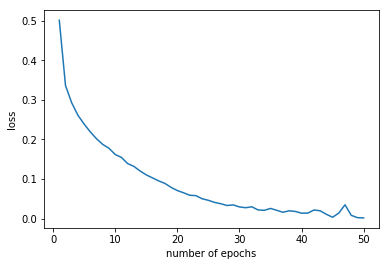

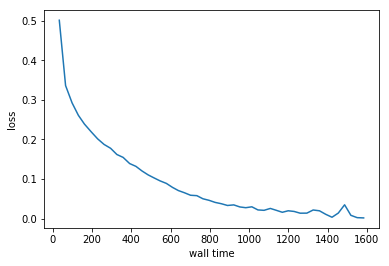

In [28]:
# Plotting graph between loss and epoch 

import matplotlib.pyplot as plt
epoch = np.arange(len(time))
epoch = epoch+1
plt.plot(epoch, history.history['loss'])
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.show()

# Plotting graph between loss and wall time

plt.plot(wall_time, history.history['loss'])
plt.ylabel("loss")
plt.xlabel("wall time")
plt.show()

In [29]:
# Prediction on training data

train_Y_pred = model.predict_classes(train_images)

# Calculating overall accuracy

print("Accuracy = ",metrics.accuracy_score(labels,train_Y_pred)*100)

Accuracy =  100.0


In [30]:
# Calculating classwise Precision, Recall and F1 score

print("Precision = ",metrics.precision_score(labels,train_Y_pred,average=None)*100)
print("Recall = ",metrics.recall_score(labels,train_Y_pred,average=None)*100)
print("F1 score = ",metrics.f1_score(labels,train_Y_pred,average=None)*100)

Precision =  [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
Recall =  [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
F1 score =  [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]


In [31]:
# Calculation of confusion matrix

cm1 = metrics.confusion_matrix(labels,train_Y_pred,labels=[0,1,2,3,4,5,6,7,8,9])
print("Confusion Matrix = ",cm1)

# Calculating classwise accuracies

cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
print("Classwise accuracy = ",(cm1.diagonal()*100))

Confusion Matrix =  [[6000    0    0    0    0    0    0    0    0    0]
 [   0 6000    0    0    0    0    0    0    0    0]
 [   0    0 6000    0    0    0    0    0    0    0]
 [   0    0    0 6000    0    0    0    0    0    0]
 [   0    0    0    0 6000    0    0    0    0    0]
 [   0    0    0    0    0 6000    0    0    0    0]
 [   0    0    0    0    0    0 6000    0    0    0]
 [   0    0    0    0    0    0    0 6000    0    0]
 [   0    0    0    0    0    0    0    0 6000    0]
 [   0    0    0    0    0    0    0    0    0 6000]]
Classwise accuracy =  [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]


In [32]:
# Loading test data

test_images,test_labels = ld.load('test')

In [33]:
# Normalizing test data

test_images = scaler.transform(test_images)

# Reshaping the test images for CNN

test_images_new = np.empty((test_images.shape[0],28,28))

for i in range (test_images.shape[0]):
    test_images_new[i,:,:]=(np.reshape(test_images[i,:],(28,28)))

test_images_new = test_images_new.reshape(-1,28,28,1)

In [34]:
# Prediction on test data

test_Y_pred = model.predict_classes(test_images_new)

# Calculating overall accuracy

print("Accuracy = ",metrics.accuracy_score(test_labels,test_Y_pred)*100)

Accuracy =  92.19000000000001


In [35]:
# Calculation of confusion matrix

cm2 = metrics.confusion_matrix(test_labels,test_Y_pred,labels=[0,1,2,3,4,5,6,7,8,9])
print("Confusion Matrix = ",cm2)

# Calculation of classwise accuracies

cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
print("Classwise accuracy = ",cm2.diagonal()*100)

Confusion Matrix =  [[884   1  15  14   3   3  74   1   5   0]
 [  2 979   3  12   3   0   1   0   0   0]
 [ 29   0 869   9  44   1  47   0   1   0]
 [ 20   5  14 917  16   1  23   0   4   0]
 [  2   1  43  21 894   0  38   0   1   0]
 [  0   0   0   0   0 985   0   9   1   5]
 [108   0  39  20  59   0 764   0  10   0]
 [  0   0   0   0   0   6   0 978   2  14]
 [  4   1   2   5   0   1   4   2 981   0]
 [  1   0   0   0   0   7   0  24   0 968]]
Classwise accuracy =  [88.4 97.9 86.9 91.7 89.4 98.5 76.4 97.8 98.1 96.8]


In [36]:
# Calculating classwise Precision, Recall and F1 score

print("Precision = ",metrics.precision_score(test_labels,test_Y_pred,average=None)*100)
print("Recall = ",metrics.recall_score(test_labels,test_Y_pred,average=None)*100)
print("F1 score = ",metrics.f1_score(test_labels,test_Y_pred,average=None)*100)

Precision =  [84.19047619 99.18946302 88.22335025 91.88376754 87.73307164 98.10756972
 80.33648791 96.44970414 97.6119403  98.07497467]
Recall =  [88.4 97.9 86.9 91.7 89.4 98.5 76.4 97.8 98.1 96.8]
F1 score =  [86.24390244 98.54051334 87.55667506 91.79179179 88.55869242 98.30339321
 78.31881087 97.12015889 97.8553616  97.43331656]
